# Music Recommendation System

Project by Rimzim Shadi

Import Libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
%matplotlib inline
%pylab 
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

Using matplotlib backend: <object object at 0x000001BAB5CC9670>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [37]:
import string
import math
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

Load Datasets

In [2]:
import os
os.getcwd()

'C:\\Users\\Sony\\Python folder'

In [6]:
members_df = pd.read_csv("members.csv")
members_df

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920


In [84]:
train1_df = pd.read_csv("train1.csv")
train1_df

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1


In [7]:
test_df = pd.read_csv("test.csv",nrows=20000)
test_df

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio
...,...,...,...,...,...,...
19995,19995,g2ZIsHl2Mheh31zqY9cbgx9MKizUzskgEcYUBhuExys=,F/zl2VkHgQs+Lx+XjS74XN1m59vNAVir/Sl11wc8Fr4=,my library,Local playlist more,local-library
19996,19996,g2ZIsHl2Mheh31zqY9cbgx9MKizUzskgEcYUBhuExys=,vM08WBQRO9eZo1K+qTJmjuw2IqbuA3L65ojbGwB4GI0=,my library,Local playlist more,local-library
19997,19997,g2ZIsHl2Mheh31zqY9cbgx9MKizUzskgEcYUBhuExys=,61cwHmq3kaaSf/yMvcEXUeGmPyG1g8gY7am/0fuECBw=,my library,Local playlist more,local-library
19998,19998,g2ZIsHl2Mheh31zqY9cbgx9MKizUzskgEcYUBhuExys=,icCxTviW2hBsVijNHZnddwcjvVi+PE7ywBQEPidLt/4=,my library,Local playlist more,local-library


In [8]:
songs_df = pd.read_csv("songs.csv",nrows=20000)
songs_df

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52
...,...,...,...,...,...,...,...
19995,XTDNdQR/VbqECrUmXlmyeOnhD4dFglDefCw/auQ/mrU=,363946,958,Rachel Podger,Heinrich Ignaz Franz von Biber,NaN,-1
19996,iUWEK/CODxzJtYSPUIp/0SM5yUd8RBrAZeCPwJFu/+c=,319712,958,Various Artists,Johann Sebastian Bach,NaN,-1
19997,ljBHnpgdxRnzxO0IJoiwVZdjlDZEUgjOvvVhLKCxwNY=,214274,958,Mozart,NaN,NaN,-1
19998,OOowMAm1BHvDzH0xt33+heZkV2lnWK2sffo9kugb9zU=,223425,465,Jorge Ben Jor,Jorge Ben Jor,NaN,52


In [9]:
song_extra_info_df = pd.read_csv("song_extra_info.csv")
song_extra_info_df

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
...,...,...,...
2295966,hLnetpF6UbPg28sSfXnPE2vsdaGsLvddlXEdJR4VTIA=,Deep Breathing,PLL431720793
2295967,N+6vJ8actKQm0S3Fpf4elipTjoAo9ev28aA5FJN5e40=,In Hiding,US5UL1519827
2295968,pv35uG0ts05mWtirM/AMOWEzbHxIVart5ZzRXqKUY1c=,Il Est Ne Le Divin Enfant,PLL431502294
2295969,QSySnm8jt2Go7byY34/PxsZP6dPCins2j2cyYquNhBo=,The Exodus Song,DEPZ69316095


In [10]:
songs_df.describe()

,song_length,language
count,2.000000e+04,20000.000000
mean,2.456958e+05,25.946550
std,1.201716e+05,23.223231
min,4.922000e+03,-1.000000
25%,1.997060e+05,3.000000
50%,2.336850e+05,17.000000
75%,2.731360e+05,52.000000
max,4.025318e+06,59.000000


In [11]:
songs_df.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [85]:
train1_df = train1_df.sample(frac=0.01)

In [86]:
train1_df.shape

(73774, 6)

In [87]:
train1_df = pd.merge(train1_df,songs_df,on="song_id",how="left")

In [88]:
train1_df.shape

(73774, 12)

In [89]:
train1_df = pd.merge(train1_df,members_df,on='msno',how='left')

In [90]:
train1_df.shape

(73774, 18)

In [91]:
train1_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,T6LXVmYEcyweM0B+sURITh22LsMZVy9Qxk0C7P6uc+g=,eqxzfyc6kVOcYTDo7GCguRsfLEplxdlJ+umjJsB8gdY=,my library,Local playlist more,local-playlist,0,NaN,NaN,NaN,NaN,NaN,NaN,4,25,female,3,20120811,20170926
1,wH0pTJ5aqKH6C5AOOMR15rhW3JWX1Qg3xrTuq8/R8+M=,8KF1EyadcfotPzlKtxlrcJeq7Ok+DvFIAy9CMOxIxks=,my library,Local playlist more,local-library,0,NaN,NaN,NaN,NaN,NaN,NaN,4,34,male,7,20150904,20170919
2,QRpwBoxj+SERky/zsn7XCUSKLyJAyTKrR7Pih1Wf0Zk=,Ju76tl7sst2EnhNgDV5Dv+Dfx4GdABb+WePRuezjpS8=,my library,Local playlist more,local-playlist,0,NaN,NaN,NaN,NaN,NaN,NaN,18,23,male,3,20120629,20170902
3,Q3uaFyFOEJF/ixkduTrOPaU6EXsqzi7XhbGp5ltR+aw=,SkrnQEebvWdP9jNzPbH5q4atY732MDnJQ1PM/2h3dUU=,explore,Explore,topic-article-playlist,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,4,20160202,20180105
4,mBfPv37ReZ+PntWSmtqeEgx77fyDRL+PSir8IPrNHuw=,nFOvIllDk4EaRUYG4t4JEnAvfZIaynNZcT4/uZSekMA=,discover,Album more,album,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,4,20161213,20161213


In [92]:
train1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73774 entries, 0 to 73773
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    73774 non-null  object 
 1   song_id                 73774 non-null  object 
 2   source_system_tab       73503 non-null  object 
 3   source_screen_name      69569 non-null  object 
 4   source_type             73541 non-null  object 
 5   target                  73774 non-null  int64  
 6   song_length             5795 non-null   float64
 7   genre_ids               5653 non-null   object 
 8   artist_name             5795 non-null   object 
 9   composer                4656 non-null   object 
 10  lyricist                3499 non-null   object 
 11  language                5795 non-null   float64
 12  city                    73774 non-null  int64  
 13  bd                      73774 non-null  int64  
 14  gender                  44332 non-null

Dealing Missing values

In [93]:
train1_df.isnull().sum()/train1_df.isnull().count()*100

msno                       0.000000
song_id                    0.000000
source_system_tab          0.367338
source_screen_name         5.699840
source_type                0.315829
target                     0.000000
song_length               92.144929
genre_ids                 92.337409
artist_name               92.144929
composer                  93.688833
lyricist                  95.257137
language                  92.144929
city                       0.000000
bd                         0.000000
gender                    39.908369
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

<Axes: >

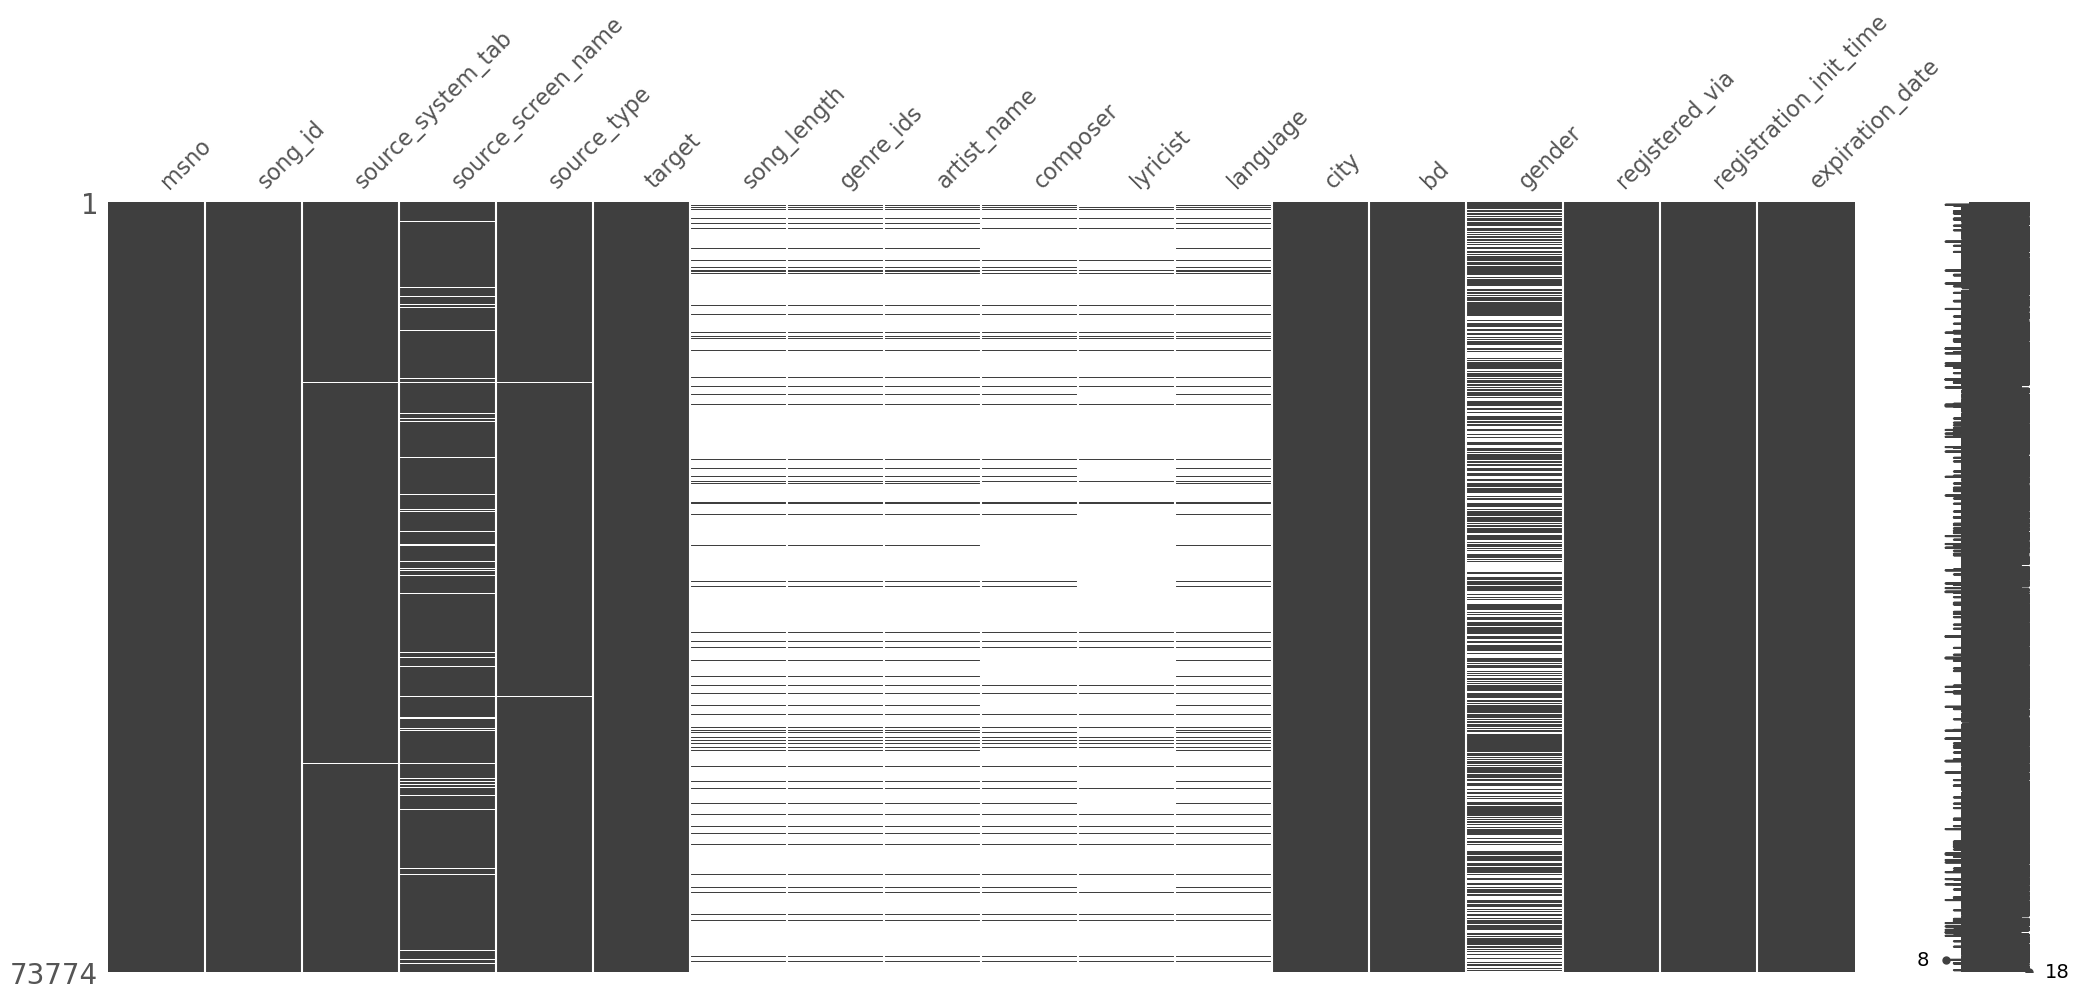

In [94]:
msno.matrix(train1_df)

In [95]:
for i in train1_df.select_dtypes(include=['object']).columns:
    train1_df[i][train1_df[i].isnull()] = 'unknown'
train1_df = train1_df.fillna(value=0)

Extracting new features

Changing Date format

In [96]:
#registration_init_time
train1_df.registration_init_time = pd.to_datetime(train1_df.registration_init_time, format = '%Y%m%d', errors = 'ignore')
train1_df['registration_init_time_year'] = train1_df['registration_init_time'].dt.year
train1_df['registration_init_time_month'] = train1_df['registration_init_time'].dt.month
train1_df['registration_init_time_day'] = train1_df['registration_init_time'].dt.day

#expiration_date
train1_df.expiration_date = pd.to_datetime(train1_df.expiration_date, format = '%Y%m%d', errors = 'ignore')
train1_df['expiration_date_year'] = train1_df['expiration_date'].dt.year
train1_df['expiration_date_month'] = train1_df['expiration_date'].dt.month
train1_df['expiration_date_day'] = train1_df['expiration_date'].dt.day

In [97]:
train1_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,T6LXVmYEcyweM0B+sURITh22LsMZVy9Qxk0C7P6uc+g=,eqxzfyc6kVOcYTDo7GCguRsfLEplxdlJ+umjJsB8gdY=,my library,Local playlist more,local-playlist,0,0.0,unknown,unknown,unknown,unknown,0.0,4,25,female,3,2012-08-11,2017-09-26,2012,8,11,2017,9,26
1,wH0pTJ5aqKH6C5AOOMR15rhW3JWX1Qg3xrTuq8/R8+M=,8KF1EyadcfotPzlKtxlrcJeq7Ok+DvFIAy9CMOxIxks=,my library,Local playlist more,local-library,0,0.0,unknown,unknown,unknown,unknown,0.0,4,34,male,7,2015-09-04,2017-09-19,2015,9,4,2017,9,19
2,QRpwBoxj+SERky/zsn7XCUSKLyJAyTKrR7Pih1Wf0Zk=,Ju76tl7sst2EnhNgDV5Dv+Dfx4GdABb+WePRuezjpS8=,my library,Local playlist more,local-playlist,0,0.0,unknown,unknown,unknown,unknown,0.0,18,23,male,3,2012-06-29,2017-09-02,2012,6,29,2017,9,2
3,Q3uaFyFOEJF/ixkduTrOPaU6EXsqzi7XhbGp5ltR+aw=,SkrnQEebvWdP9jNzPbH5q4atY732MDnJQ1PM/2h3dUU=,explore,Explore,topic-article-playlist,1,0.0,unknown,unknown,unknown,unknown,0.0,1,0,unknown,4,2016-02-02,2018-01-05,2016,2,2,2018,1,5
4,mBfPv37ReZ+PntWSmtqeEgx77fyDRL+PSir8IPrNHuw=,nFOvIllDk4EaRUYG4t4JEnAvfZIaynNZcT4/uZSekMA=,discover,Album more,album,1,0.0,unknown,unknown,unknown,unknown,0.0,1,0,unknown,4,2016-12-13,2016-12-13,2016,12,13,2016,12,13


In [98]:
#Changing Dates to category
train1_df['registration_init_time'] = train1_df['registration_init_time'].astype('category')
train1_df['expiration_date'] = train1_df['expiration_date'].astype('category')

In [99]:
# Object Date to category
for col in train1_df.select_dtypes(include=['object']).columns:
    train1_df[col] = train1_df[col].astype('category')
    
# Encoding categorical features
for col in train1_df.select_dtypes(include=['category']).columns:
    train1_df[col] = train1_df[col].cat.codes

In [100]:
train1_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,9021,18449,3,8,4,0,0.0,79,677,740,334,0.0,4,25,0,3,2036,585,2012,8,11,2017,9,26
1,17700,4407,3,8,3,0,0.0,79,677,740,334,0.0,4,34,1,7,3144,578,2015,9,4,2017,9,19
2,8266,9412,3,8,4,0,0.0,79,677,740,334,0.0,18,23,1,3,1995,561,2012,6,29,2017,9,2
3,8170,13240,1,7,11,1,0.0,79,677,740,334,0.0,1,0,2,4,3295,686,2016,2,2,2018,1,5
4,14712,22060,0,0,0,1,0.0,79,677,740,334,0.0,1,0,2,4,3544,298,2016,12,13,2016,12,13


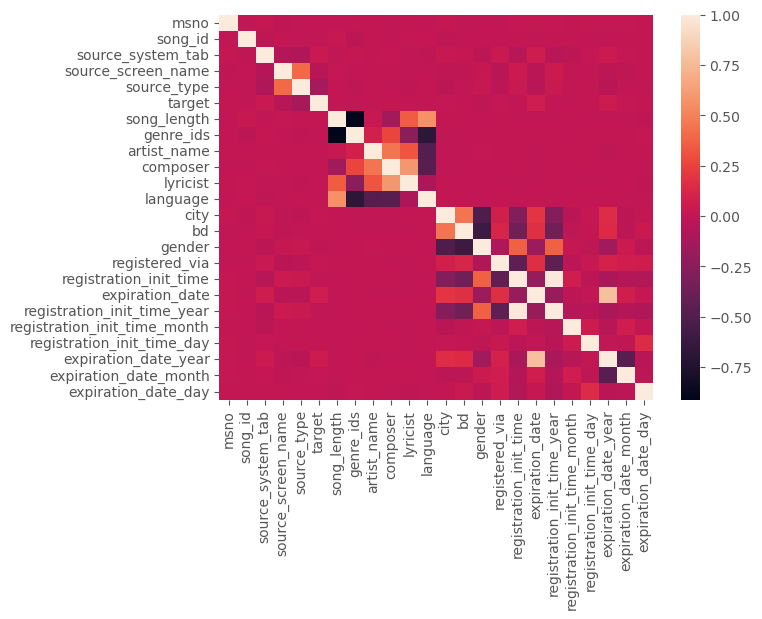

In [101]:
#correlation matrix
plt.figure(figsize=(7,5))
sns.heatmap(train1_df.corr())  #annot=True
plt.show()

Modelling

In [102]:
# Drop columns
train1_df = train1_df.drop(['expiration_date','lyricist'],1)

In [103]:
train1_df.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'language', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'registration_init_time_year',
       'registration_init_time_month', 'registration_init_time_day',
       'expiration_date_year', 'expiration_date_month', 'expiration_date_day'],
      dtype='object')

In [104]:
train1_df.shape

(73774, 22)

In [105]:
train2 = train1_df.copy()

In [107]:
X_train.shape

(55330, 21)

In [108]:
y_train.shape

(55330,)

In [109]:
X_train = train1_df.drop('target', axis=1).values
y_train = train1_df['target'].values
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.25)


Random Forest with Class weights

In [110]:
rf = RandomForestClassifier(n_estimators = 250,max_depth=25,random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=25, n_estimators=250, random_state=0)

In [111]:
train_plot = pd.DataFrame({'features':train1_df.columns[train1_df.columns!='target'],
                        'importances':rf.feature_importances_})
train_plot = train_plot.sort_values('importances',ascending=False)

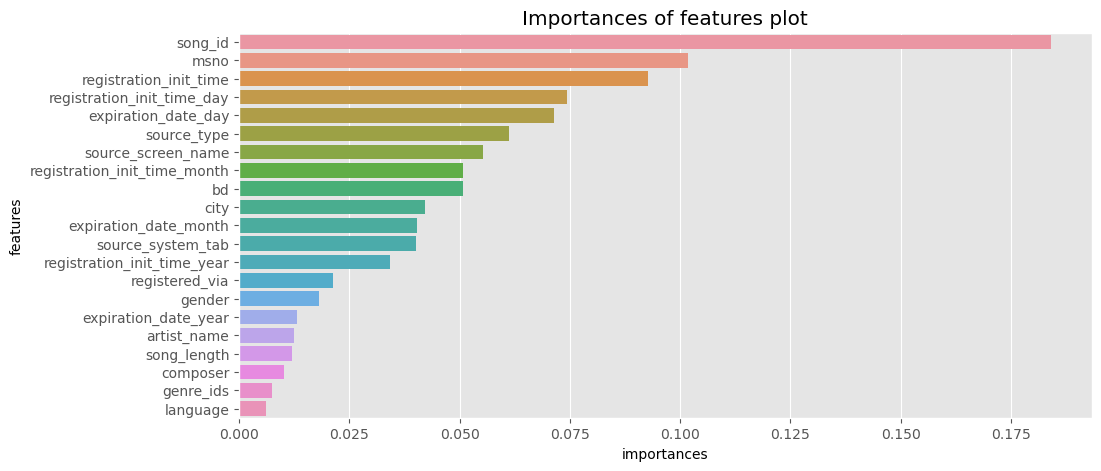

In [112]:
plt.figure(figsize=[11,5])
sns.barplot(x = train_plot.importances, y = train_plot.features)
plt.title('Importances of features plot')
plt.show()

In [113]:
train3 = train1_df.copy()

In [114]:
train3 = train3.drop(train_plot.features[train_plot.importances < 0.04].tolist(),1)


In [115]:
train3.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'city', 'bd', 'registration_init_time',
       'registration_init_time_month', 'registration_init_time_day',
       'expiration_date_month', 'expiration_date_day'],
      dtype='object')

XGboost

In [116]:
# Train & test split
train4 = train1_df.copy()

In [117]:
X_train1 = train4.drop(['target'],axis = 1).values
y_train1 = train4['target'].values

In [118]:
X_train,X_val,y_train,y_val = train_test_split(X_train1,y_train1,test_size=0.25)

In [119]:
# Create model
model2 = xgb.XGBClassifier(learning_rate=0.1,max_depth=15, min_child_weight=5,n_estimators=250)
model2.fit(X_train1,y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [120]:
X_train1.shape

(73774, 21)

In [121]:
# Prediction
Prediction = model2.predict(X_val)

In [122]:
from sklearn import metrics

In [123]:
print(metrics.classification_report(y_val,Prediction))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      9147
           1       0.93      0.96      0.95      9297

    accuracy                           0.95     18444
   macro avg       0.95      0.95      0.95     18444
weighted avg       0.95      0.95      0.95     18444



The accuracy of the model is 95% using XGB model